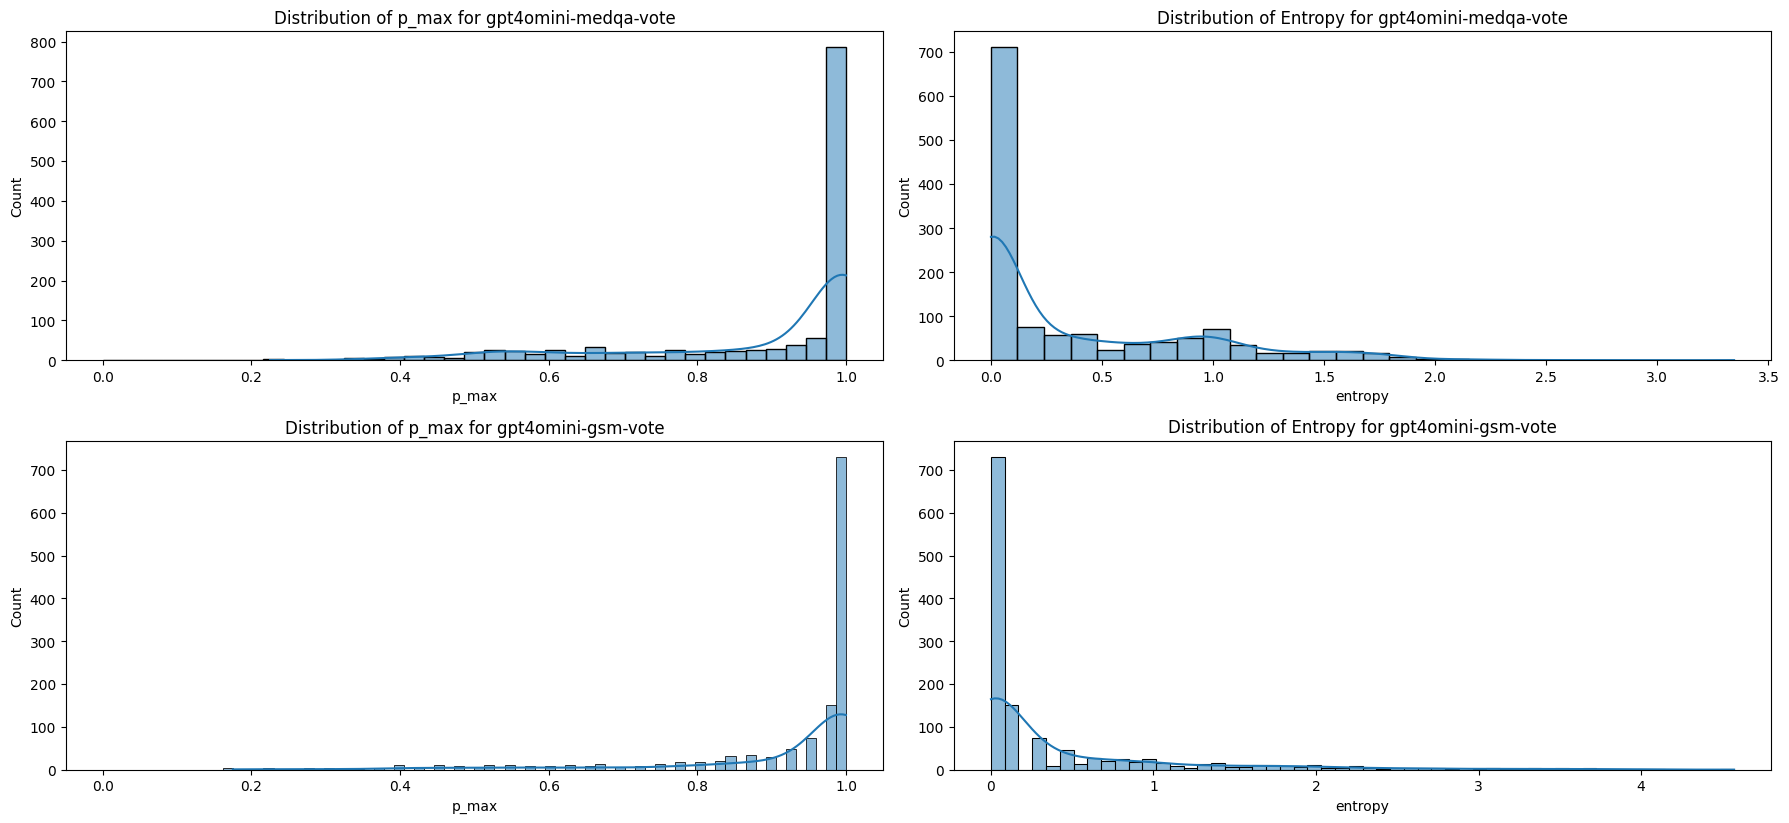

In [1]:
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt

def sort_key(file_name):
    match = re.search(r'(\d+)\.csv$', file_name)
    return int(match.group(1)) if match else -1

def process_folder(folder_path):
    csv_files = sorted(glob.glob(f"{folder_path}/*.csv"), key=sort_key)
    results = []

    for csv in csv_files:
        df = pd.read_csv(csv)
        unique_answers = df['answer'].nunique()
        value_counts = df['answer'].value_counts(normalize=True)
        p_max = value_counts.max()
        p_second = value_counts.nlargest(2).iloc[1] if len(value_counts) > 1 else 0
        entropy = -(value_counts * np.log2(value_counts)).sum()
        file_index = int(re.search(r'(\d+)\.csv$', csv).group(1))
        results.append({'file_index': file_index, 'unique_answers': unique_answers, 'p_max': p_max, 'p_second': p_second, 'entropy': entropy})

    results_df = pd.DataFrame(results)
    return results_df

# Process each folder
folders = ["./resources/gpt4omini-medqa-vote", './resources/gpt4omini-gsm-vote']
all_results = []

for folder in folders:
    folder_results = process_folder(folder)
    folder_results['model'] = folder.split('/')[-1]
    all_results.append(folder_results)

# Combine all results into a single dataframe
combined_results_df = pd.concat(all_results, ignore_index=True)

# Plot the results
plt.figure(figsize=(18, 12))

for i, model in enumerate(folders):
    model_name = model.split('/')[-1]
    model_df = combined_results_df[combined_results_df['model'] == model_name]

    plt.subplot(3, 2, 2*i + 1)
    sns.histplot(model_df['p_max'], kde=True, binrange=(0, 1))
    plt.title(f'Distribution of p_max for {model_name}')

    plt.subplot(3, 2, 2*i + 2)
    sns.histplot(model_df['entropy'], kde=True)
    plt.title(f'Distribution of Entropy for {model_name}')

plt.tight_layout()
plt.show()

In [2]:
combined_results_df[combined_results_df['model'] == 'gpt4omini-medqa-vote'].unique_answers.value_counts()

unique_answers
1     711
2     320
3     145
4      67
5      21
6       4
7       1
14      1
10      1
12      1
8       1
Name: count, dtype: int64

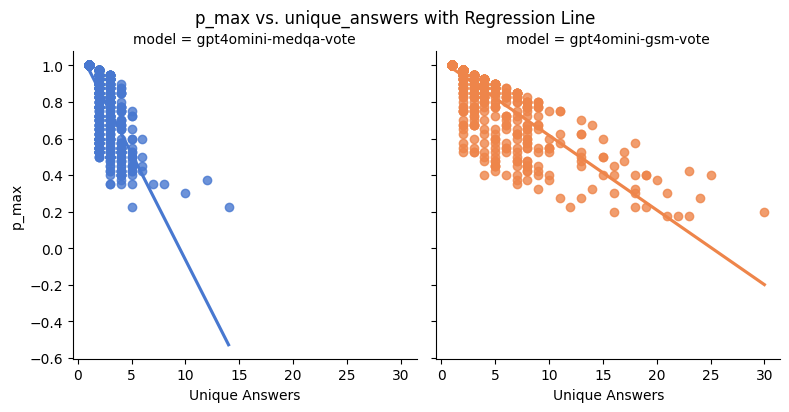

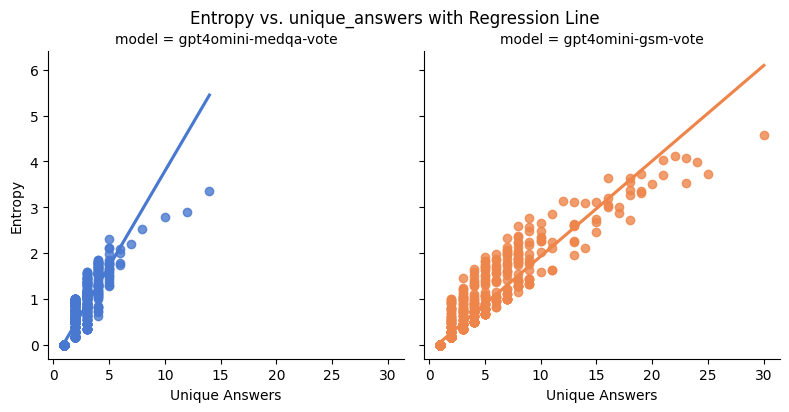

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- First figure: p_max vs. unique_answers ---
g1 = sns.lmplot(
    data=combined_results_df, 
    x='unique_answers', 
    y='p_max', 
    hue='model', 
    col='model', 
    ci=None, 
    palette='muted', 
    height=4, 
    aspect=1
)
# Give the figure a title
g1.fig.suptitle('p_max vs. unique_answers with Regression Line', y=1.02)
# Set axis labels
g1.set_axis_labels('Unique Answers', 'p_max')


# --- Second figure: entropy vs. unique_answers ---
g2 = sns.lmplot(
    data=combined_results_df, 
    x='unique_answers', 
    y='entropy', 
    hue='model', 
    col='model', 
    ci=None, 
    palette='muted', 
    height=4, 
    aspect=1
)
# Give the figure a title
g2.fig.suptitle('Entropy vs. unique_answers with Regression Line', y=1.02)
# Set axis labels
g2.set_axis_labels('Unique Answers', 'Entropy')

# Finally, show everything
plt.show()


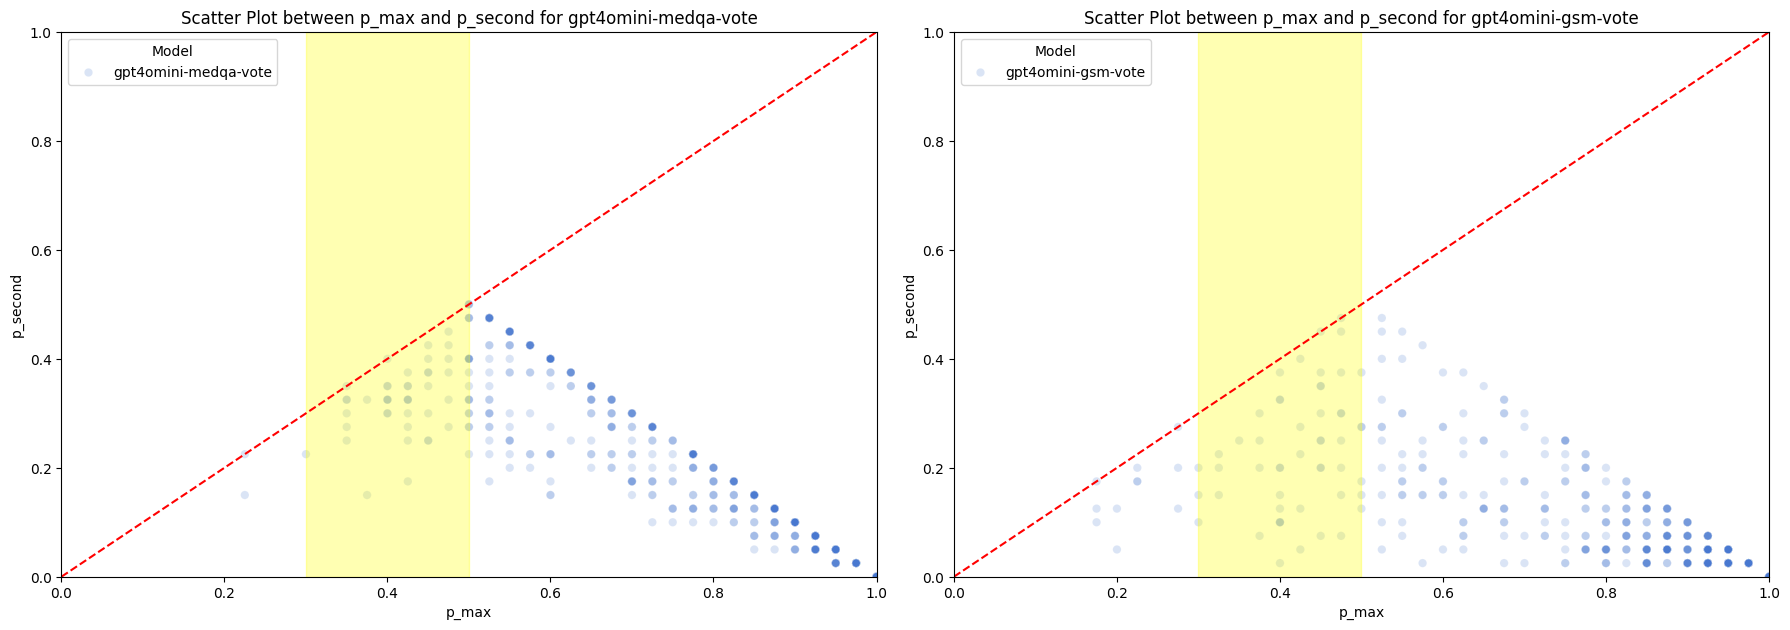

In [6]:
unique_models = combined_results_df['model'].unique()

plt.figure(figsize=(18, 12))

for i, model_name in enumerate(unique_models):
    plt.subplot(2, 2, i + 1)
    model_df = combined_results_df[combined_results_df['model'] == model_name]
    sns.scatterplot(data=model_df, x='p_max', y='p_second', hue='model', palette='muted', alpha=0.2)
    plt.axvspan(0.3, 0.5, color='yellow', alpha=0.3)
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Add y=x line
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title(f'Scatter Plot between p_max and p_second for {model_name}')
    plt.xlabel('p_max')
    plt.ylabel('p_second')
    plt.legend(title='Model')

plt.tight_layout()
plt.show()